# Librairies

In [364]:
import os
import pandas as pd

# Read File and get overall information of the dataframe

Read imported files
Sources : https://www.kaggle.com/teajay/global-shark-attacks

In [365]:
initial_data=pd.read_csv('/Users/sandrine/desktop/prework/Projects_Ironhack/Shark_lab/attacks.csv',encoding='latin-1')
# use encoding = 'Latin-1 '

In [366]:
initial_data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [367]:
#Number of rows and columns
initial_data.shape

(25723, 24)

In [368]:
# check DataFrame info
initial_data.info()

# all the columns at max 1/3 full=> there may be fully null rows in the dataframe
# 3 columns named Case Number==> check whether there are the same or not and whether it is necessary to keep them all.
# 2 Unnamed colums with almost no values . Check whether they can be deleted.
# Can species and time and age be used given the high level of missingg data?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

**Analyze the DataFrame general information before starting

In [369]:
# function checking the Frequency of the different elements in each column of a dataframe
def freq_element_percolumn(data):
    cols=data.columns
    for i in cols:
        freq_per_element=pd.Series(data[i]).value_counts(normalize=True)*100
        print(f'Column studied is : {i}')
        display(freq_per_element)
    return

#freq_element_percolumn(initial_data)

# CLEANING


In [370]:
# General cleaning:
# Clean column titles => to ease selection 
# delete empty rows and columns
# delete duplicated rows and columns
# check whether it is worth keepin 3 columns case number


 ° Clean column titles 

In [371]:
initial_data.columns=pd.Series(list(initial_data.columns)).str.lower().str.title().str.replace(' ','_').str.replace('Sex_','Sex').str.replace('Species_','Species').str.replace(':','').str.replace('.','')
initial_data.head()

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator_Or_Source,Pdf,Href_Formula,Href,Case_Number1,Case_Number2,Original_Order,Unnamed_22,Unnamed_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [372]:
# Delete empty rows and columns

In [373]:
# drop rows if there is maximum 2 values in the row.
def Drop_almost_empty_rows(data):
    return data[data.isnull().sum(axis=1) <= len(data.columns) - 3]
data=Drop_almost_empty_rows(initial_data)
data

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator_Or_Source,Pdf,Href_Formula,Href,Case_Number1,Case_Number2,Original_Order,Unnamed_22,Unnamed_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN


In [374]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case_Number             6301 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal_(Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null   

In [375]:
#Deleting not necessary columns.
data=data.drop(['Unnamed_22','Unnamed_23'],axis=1)
data

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal_(Y/N),Time,Species,Investigator_Or_Source,Pdf,Href_Formula,Href,Case_Number1,Case_Number2,Original_Order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0


In [376]:
# found on google: https://thispointer.com/how-to-find-drop-duplicate-columns-in-a-dataframe-python-pandas/
def get_duplicated_columns(data):        
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duPcolumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(data.shape[1]):
        # Select column at xth index.
        col = data.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x+1,data.shape[1]):
            # Select column at yth index.
            otherCol = data.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duPcolumnNames.add(data.columns.values[y])
    return list(duPcolumnNames)

get_duplicated_columns(data)
# no duplicated columns

[]

In [377]:
# check duplitated rows:
data=data.drop_duplicates()

In [378]:
# Check the differences between 3 columns Case_Number ==> Not worth to be cleaned as not used. 

In [379]:
def Check_Dup_Two_columns(data,col1,col2):
    
    CheckDup=list(data[col1]==data[col2])
    # Index where the the differences occurs
    indexDup=[i for i in range(len(CheckDup)) if CheckDup[i]==False] 
    print(f'position of duplicates elements for {col1} & {col2} is {indexDup}. There is {len(indexDup)} positions.')
    return indexDup

set1=set(Check_Dup_Two_columns(data,'Case_Number','Case_Number2'))
set2=set(Check_Dup_Two_columns(data,'Case_Number','Case_Number1'))
set3=set(Check_Dup_Two_columns(data,'Case_Number2','Case_Number1'))
print('to check', set1.union(set2).union(set3))

for i in set1.union(set2).union(set3):
    display(data.iloc[i]) 

position of duplicates elements for Case_Number & Case_Number2 is [390, 4949, 5488, 5944]. There is 4 positions.
position of duplicates elements for Case_Number & Case_Number1 is [34, 117, 144, 217, 314, 334, 339, 390, 560, 3522, 3795, 3880, 4403, 4425, 4949, 5275, 5358, 5386, 5488, 5777, 5883, 5944, 6009, 6122]. There is 24 positions.
position of duplicates elements for Case_Number2 & Case_Number1 is [34, 117, 144, 217, 314, 334, 339, 560, 3522, 3795, 3880, 4403, 4425, 5275, 5358, 5386, 5777, 5883, 6009, 6122]. There is 20 positions.
to check {390, 5386, 144, 5777, 5275, 34, 3880, 560, 4403, 5944, 314, 3522, 4425, 334, 339, 3795, 4949, 217, 6122, 5358, 5488, 117, 6009, 5883}


Case_Number                                                      2015.07-10
Date                                                            10-Jul-2015
Year                                                                   2015
Type                                                             Unprovoked
Country                                                                 USA
Area                                                             California
Location                                    Huntington Beach, Orange County
Activity                                                            Surfing
Name                                                           Danny Miskin
Sex                                                                       M
Age                                                                      38
Injury                              No injury, shark bumped & damaged board
Fatal_(Y/N)                                                               N
Time        

Case_Number                                                    1911.07.31.R
Date                                                   Reported 31-Jul-1911
Year                                                                   1911
Type                                                             Unprovoked
Country                                                               SPAIN
Area                                                                Málaga 
Location                                                              Ceuta
Activity                                                            Bathing
Name                                                              a soldier
Sex                                                                       M
Age                                                                     NaN
Injury                                                                FATAL
Fatal_(Y/N)                                                               Y
Time        

Case_Number                                                      2017.05.06
Date                                                            05-May-2017
Year                                                                   2017
Type                                                             Unprovoked
Country                                                              MEXICO
Area                                                    Baja California Sur
Location                                          Los Arbolitos, Cabo Pulmo
Activity                                                         Snorkeling
Name                                                          Andres Rozada
Sex                                                                       M
Age                                                                      33
Injury                                                                FATAL
Fatal_(Y/N)                                                               Y
Time        

Case_Number                                                    1884.04.38.R
Date                                                   Reported 28-Apr-1884
Year                                                                   1884
Type                                                             Unprovoked
Country                                                              BRAZIL
Area                                                                    NaN
Location                                                              Bahia
Activity                            Fell overboard from the steamship Chala
Name                                                                   male
Sex                                                                       M
Age                                                                     NaN
Injury                                                                FATAL
Fatal_(Y/N)                                                               Y
Time        

Case_Number                                                    1900.00.00.R
Date                                   Reported to have taken place in 1919
Year                                                                   1919
Type                                                                Boating
Country                                                               ITALY
Area                                                                    NaN
Location                                                             Savona
Activity                                                            Fishing
Name                                                                    NaN
Sex                                                                       M
Age                                                                     NaN
Injury                                                            No injury
Fatal_(Y/N)                                                               N
Time        

Case_Number                                                      2018.04.03
Date                                                            03-Apr-2018
Year                                                                   2018
Type                                                             Unprovoked
Country                                                        SOUTH AFRICA
Area                                                  Eastern Cape Province
Location                                                    St. Francis Bay
Activity                                                            Surfing
Name                                                           Ross Spowart
Sex                                                                       M
Age                                                                      19
Injury                                 Lacerations to left knee & lower leg
Fatal_(Y/N)                                                               N
Time        

Case_Number                                                    1961.09.02.R
Date                                                   Reported 06-Sep-1961
Year                                                                   1961
Type                                                               Provoked
Country                                                               ITALY
Area                                                        Venice Province
Location                                                           Chioggia
Activity                                                            Fishing
Name                                  Pollione Perrini & Fioravante Perini 
Sex                                                                       M
Age                                                                 33 & 37
Injury                    Left foot & right hand bitten by netted shark ...
Fatal_(Y/N)                                                               N
Time        

Case_Number                                                      2014.05.04
Date                                                            04-May-2014
Year                                                                   2014
Type                                                             Unprovoked
Country                                                        SOUTH AFRICA
Area                                                  Western Cape Province
Location                                                         Simonstown
Activity                                                             Diving
Name                                                                    NaN
Sex                                                                     NaN
Age                                                                     NaN
Injury                                             4-inch laceration to arm
Fatal_(Y/N)                                                               N
Time        

Case_Number                                                      1952.08.05
Date                                                            05-Aug-1952
Year                                                                   1952
Type                                                               Provoked
Country                                                               ITALY
Area                                                                 Teramo
Location                                                         Giulianova
Activity                                                            Fishing
Name                                                         Vittorio Speca
Sex                                                                     NaN
Age                                                                      19
Injury                                  Multiple injuries PROVOKED INCIDENT
Fatal_(Y/N)                                                               Y
Time        

Case_Number                                                         1864.05
Date                                                               May-1864
Year                                                                   1864
Type                                                             Unprovoked
Country                                                           MAURITIUS
Area                                            300 miles east of Mauritius
Location                                                                NaN
Activity                                                     Fell overboard
Name                                         male from the whaler Albatross
Sex                                                                       M
Age                                                                     NaN
Injury                                                                FATAL
Fatal_(Y/N)                                                               Y
Time        

Case_Number                                                    2016.01.24.b
Date                                                            24-Jan-2016
Year                                                                   2016
Type                                                             Unprovoked
Country                                                                 USA
Area                                                                  Texas
Location                                                       Off Surfside
Activity                                                       Spearfishing
Name                                                             Keith Love
Sex                                                                       M
Age                                                                     NaN
Injury                    Bruised ribs & tail bone, speargun broken and ...
Fatal_(Y/N)                                                               N
Time        

Case_Number                                                      1967.07.05
Date                                                            05-Jul-1967
Year                                                                   1967
Type                                                             Unprovoked
Country                                                              TURKEY
Area                                                         Mugla Province
Location                                                    Kucukada Island
Activity                                                       Spearfishing
Name                                                           Gungor Guven
Sex                                                                       M
Age                                                                      36
Injury                                                                FATAL
Fatal_(Y/N)                                                               Y
Time        

Case_Number                                                    1851.12.15.R
Date                                                         \n1951.12.15.R
Year                                                                   1951
Type                                                                Invalid
Country                                                          MOZAMBIQUE
Area                                                        Sofala Province
Location                                                              Beira
Activity                                                           Swimming
Name                                               Antonio De Almeida Pinto
Sex                                                                       M
Age                                                                     NaN
Injury                                                            No injury
Fatal_(Y/N)                                                             NaN
Time        

Case_Number                                                      2015.12.23
Date                                                            07-Nov-2015
Year                                                                   2015
Type                                                                Invalid
Country                                                                 USA
Area                                                                Florida
Location                          Paradise Beach, Melbourne, Brevard County
Activity                                                            Surfing
Name                                                         Ryla Underwood
Sex                                                                       F
Age                                                                       9
Injury                                               Lower left leg injured
Fatal_(Y/N)                                                             NaN
Time        

Case_Number                                                    2015.10.28.a
Date                                                            28-Oct-2015
Year                                                                   2015
Type                                                             Unprovoked
Country                                                                 USA
Area                                                                 Hawaii
Location                                                       Malaka, Oahu
Activity                                                      Body boarding
Name                                                        Raymond Senensi
Sex                                                                       M
Age                                                                      10
Injury                    Lacerations & puncture wounds to right thigh, ...
Fatal_(Y/N)                                                               N
Time        

Case_Number                                                    1962,08.30.b
Date                                                            30-Aug-1962
Year                                                                   1962
Type                                                                   Boat
Country                                                              TURKEY
Area                                                       Antalya Province
Location                                                             Ucagiz
Activity                                                                NaN
Name                                                   Occupant: Hasan Olta
Sex                                                                       M
Age                                                                     NaN
Injury                                                           No injury 
Fatal_(Y/N)                                                               N
Time        

Case_Number                                                    1934.01.08.R
Date                                                   Reported 08-Feb-1934
Year                                                                   1934
Type                                                                Boating
Country                                                              TURKEY
Area                                                               Istanbul
Location                                         Haydarpasa jetty, Istanbul
Activity                                                            Fishing
Name                                                                2 males
Sex                                                                       M
Age                                                                     NaN
Injury                                                            No injury
Fatal_(Y/N)                                                               N
Time        

Case_Number                                                      2016.09.15
Date                                                            16-Sep-2016
Year                                                                   2016
Type                                                             Unprovoked
Country                                                           AUSTRALIA
Area                                                               Victoria
Location                                                        Bells Beach
Activity                                                            Surfing
Name                                                                   male
Sex                                                                       M
Age                                                                     NaN
Injury                                No injury: Knocked off board by shark
Fatal_(Y/N)                                                               N
Time        

Case_Number                                                    1808.06.01.R
Date                                                   Reported 01-May-1808
Year                                                                   1808
Type                                                           Sea Disaster
Country                                                             ANTIGUA
Area                                                                    NaN
Location                                                   Falmouth Harbour
Activity                                                                NaN
Name                                                                    NaN
Sex                                                                     NaN
Age                                                                     NaN
Injury                                       Probable drowning & scavenging
Fatal_(Y/N)                                                             NaN
Time        

Case_Number                                                    1913.07.10.R
Date                                                   Reported 10-Jul-1913
Year                                                                   1913
Type                                                             Unprovoked
Country                                                          COSTA RICA
Area                                                                    NaN
Location                                                         Port Limon
Activity                                                           Swimming
Name                                          August Schulke & Karl Schafer
Sex                                                                       M
Age                                                                     NaN
Injury                                                                FATAL
Fatal_(Y/N)                                                               Y
Time        

Case_Number                                                             NaN
Date                                                   Reported 06-Sep-1905
Year                                                                   1905
Type                                                               Provoked
Country                                                                 USA
Area                                                                Florida
Location                                       Fort Pierce, St Lucie County
Activity                                                            Fishing
Name                                                            David Curry
Sex                                                                       M
Age                                                                     NaN
Injury                    Lacerations to leg from hooked shark PROVOKED ...
Fatal_(Y/N)                                                               N
Time        

Case_Number                                                    2017.07.20.a
Date                                                            20-Jul-2017
Year                                                                   2017
Type                                                             Unprovoked
Country                                                                 USA
Area                                                             California
Location                             Seal Rock, Goleta Beach, Santa Barbara
Activity                                                                SUP
Name                                                           Rolf Geyling
Sex                                                                       M
Age                                                                      50
Injury                                     No injury, shark bit paddleboard
Fatal_(Y/N)                                                               N
Time        

Case_Number                                                      1853,94.29
Date                                                            29-Apr-1853
Year                                                                   1853
Type                                                             Unprovoked
Country                                                              GREECE
Area                                                                 Corfu 
Location                                                                NaN
Activity                                                           Swimming
Name                                                                 Hanson
Sex                                                                       M
Age                                                                     NaN
Injury                                                  Leg severed at knee
Fatal_(Y/N)                                                               N
Time        

Case_Number                                                    1876.06.18.R
Date                                                  Reported 18-Jun- 1874
Year                                                                   1874
Type                                                             Unprovoked
Country                                                              MEXICO
Area                                                              Veracruz 
Location                                             Tlacotalpan, Vera Cruz
Activity                                                            Bathing
Name                                              a servant of General Diaz
Sex                                                                       M
Age                                                                     NaN
Injury                                                                FATAL
Fatal_(Y/N)                                                               Y
Time        

# Cleaning linked to the problematics

problematics:
* trtr
* trt

#TO DO : Clean Year, fatal Area maybe activity

In [380]:
# questions to answer : When and where and for which activity were the most fatal attacks /

# Cleaning of column Year

In [381]:

#Let's have a look to the values in the column to clean 


In [382]:
def get_basic_info_for_column(data,col):
    #check frequency of each element of the column (in %)
    display(pd.Series(data[col]).value_counts(normalize=True)*100)
    #print the min and the max for numeric data
    if data[col].dtype=='float64' or  data[col].dtype=='int':
        print('Min & Max', min(data[col]), max(data[col]))
    #how many missing data in Year column?:
    print('nb of missing values' ,data[col].isnull().sum())
    return None
get_basic_info_for_column(data,'Year')

2015.0    2.269841
2017.0    2.158730
2016.0    2.063492
2011.0    2.031746
2014.0    2.015873
            ...   
1801.0    0.015873
1638.0    0.015873
1834.0    0.015873
1723.0    0.015873
1786.0    0.015873
Name: Year, Length: 249, dtype: float64

Min & Max 0.0 2018.0
nb of missing values 2


In [383]:
# isolate missing values in column Year and display the associated rows
data[data.Year.isnull()]
# 2 rows concerned: n87 and 6079.
# First find the year using the  reported date 
#check whether other field in the row have an issue, especially the columns you are interested in  and clean them if possible
# at the same time
#Second use the pdf to fill in the missing information if necessary. 


,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal_(Y/N),Time,Species,Investigator_Or_Source,Pdf,Href_Formula,Href,Case_Number1,Case_Number2,Original_Order
187,2017.01.08.R,Reported 08-Jan-2017,NaN,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,Kerry Daniel,M,...,NaN,NaN,Bull shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.08.R,2017.01.08.R,6116.0
6079,1836.08.19.R,Reported 19-Aug-1836,NaN,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,...,Y,NaN,NaN,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,224.0


In [384]:
data.Year.iloc[187]=2017
data.Year.iloc[6079]=1836
#check if there are still missing values
data[data.Year.isnull()]
#drop remaining rows by selecting the none null values of years
data=data[data.Year.notnull()]
# select the Year =0
data[data.Year==0] # 125 rows with a year =0 vs 6300 records. 1%. To be treated if sufficient time
# display date column  for Year =0 to see wether the year appear in the date
pd.Series(data[data.Year==0].Date).value_counts() # compare with the year of full set. 
#Check the number of rows if we do buckets like 'before 1960 (2500 rows more than 1/3 of therows , before 1920)
# 125 rows with no exact date no change for the moment . Doing
data[data.Year==0].Date.to_list() # put the date for Year ==0 to see whether some records could be treated 
data[data.Year==0]

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal_(Y/N),Time,Species,Investigator_Or_Source,Pdf,Href_Formula,Href,Case_Number1,Case_Number2,Original_Order
6177,0000.0214,Ca. 214 B.C.,0.0,Unprovoked,NaN,Ionian Sea,NaN,Ascending from a dive,"Tharsys, a sponge diver",M,...,Y,NaN,NaN,"Reported by Greek poet, Leonidas of Tarentum (...",214BC-Tharsys.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0000.0214,0000.0214,126.0
6178,0000.0336,Ca. 336.B.C..,0.0,Unprovoked,GREECE,Piraeus,In the haven of Cantharus,Washing his pig in preparation for a religious...,A candidate for initiation,M,...,Y,NaN,NaN,Plutarch (45 - 125 A.D.) in Life of Phoecion (...,336-BC-Carnathus.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0000.0336,0000.0336,125.0
6179,0000.0493,493 B.C.,0.0,Sea Disaster,GREECE,Off Thessaly,NaN,Shipwrecked Persian Fleet,males,M,...,Y,NaN,NaN,Herodotus (485 - 425 B.C.),493BC-PersianFleet.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0000.0493,0000.0493,124.0
6180,0000.0725,Ca. 725 B.C.,0.0,Sea Disaster,ITALY,Tyrrhenian Sea,Krater found during excavations at Lacco Ameno...,Shipwreck,males,M,...,Y,NaN,NaN,"V.M. Coppleson (1958), p.262, et al",725BC-vase.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0000.0725,0000.0725,123.0
6181,ND-0154,Before 1939,0.0,Unprovoked,CANADA,NaN,Grand Banks,Fishing,Joe Folsom,M,...,N,NaN,NaN,"C.E.Russell, pp. 310-311",ND-0154-Folsom.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0154,ND-0154,122.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0


# partial of Cleaning Species columns

In [385]:
#trying to identify invalid rows using species to go faster in the cleaning of Fatal column(from 538 to 62 missing values to clean)

In [387]:
get_basic_info_for_column(data,'Species' )
data.Species=data.Species=data.Species.str.lower().str.replace(' ','_').replace(['shark_involvement_questionable','questionable_incident','shark_involvement_prior_to_death_was_not_confirmed','shark_involvement_not_confirmed','shark_involvement_prior_to_death_unconfirmed','questionable','no_shark_involvement','shark_involvement_prior_to_death_not_confirmed', 'shark_involvement_prior_to_death_suspected_but_not_confirmed','shark_involvement_probable','shark_involvement_doubtful','shark_involvement_not_cofirmed',"thought_to_involve_a_3'_to_4'_shark,_but_shark_involvement_not_confirmed",'shark_involvement_unconfirmed','shark_involvement_prior_to_death_still_to_be_determined','shark_involvement_not_confirmed;_thought_to_be_a_barracuda_bite','shark_involvement_prior_to_deaths_was_not_confirmed','reported_by_media_as_shark_attack,_but_shark_involvement_prior_to_death_was_not_confirmed','shark_involvement__questionable','shark_involvement_not_confirmed,_injury_may_have_been_caused_by_a_bluefish','questionable_incident_-_shark_bite_may_have_precipitated_drowning','invalid_incident','questionable_incident;_reported_as_shark_attack_but_thought_to_involve_a_pinniped_instead_','considered_a_"doubtful"_incident','salmon_shark_suspected,_but_unlikely',"questionable_incident,_said_to_involve_a_6'_shark",'shark_involvement_prior_to_death_could_not_be_determined','shark_involvement_suspected_but_not_confirmed'],'invalid')
data=data[data.Species!='invalid']


white_shark                             5.534931
tiger_shark                             2.463719
bull_shark                              1.856227
4'_shark                                1.349983
6'_shark                                1.349983
                                          ...   
goblin_shark,_4.2'                      0.033750
blue_sharks                             0.033750
mako_shark,_3_m_to_4_m_[10'_to_13']_    0.033750
white_shark,_10'_to_12'                 0.033750
death_may_have_been_due_to_drowning     0.033750
Name: Species, Length: 1506, dtype: float64

nb of missing values 2838


# Cleaning Fatal column

In [388]:
def get_basic_info_for_column(data,col):
    #check frequency of each element of the column (in %)
    display(pd.Series(data[col]).value_counts(normalize=True)*100)
    #print the min and the max for numeric data
    if data[col].dtype=='float64' or  data[col].dtype=='int':
        print('Min & Max', min(data[col]), max(data[col]))
    #how many missing data in Year column?:
    print('nb of missing values' ,data[col].isnull().sum())
    return None
get_basic_info_for_column(data,'Fatal_(Y/N)' )

N          74.560028
Y          24.028576
UNKNOWN     1.219725
 N          0.121972
y           0.017425
M           0.017425
N           0.017425
2017        0.017425
Name: Fatal_(Y/N), dtype: float64

nb of missing values 62


In [389]:
# clean "typo" errors
data['Fatal_(Y/N)']=data['Fatal_(Y/N)'].str.upper().replace([' N','N ','M'],'N')

In [390]:

#provide injuries description for NAN in Fatal column and depending on the description I assign Y, N or UNKNOWN in FATAL
data[data['Fatal_(Y/N)'].isnull()].Injury.to_dict()




{27: 'Multiple severe injuries to arms and leg, leg subsequently surgically amputated',
 76: 'FATAL',
 84: 'FATAL, but death was probably due to drowning',
 107: 'Abrasions and cuts to sole of foot',
 125: 'Arm injured by hook, not by a shark',
 145: 'Laceration to thigh, likely caused by surfboard fin',
 151: 'Alleged laceration to left ankle',
 187: 'No attack, shark made a threat display',
 206: 'Shark breached cage, no injury to diver',
 265: 'No injury, board damaged',
 269: 'No injury, but sharks repeatedly hit their fins and guns',
 291: 'Fell off board when spinner shark leapt from the water next to him. No injury to surfer',
 382: 'Injury to hand',
 466: 'Minor cuts on feet',
 708: 'No injury, a 3 m blue shark merely snapped at the man.',
 763: 'Probable drowning with post-mortem bite',
 768: 'Cause of death was drowning & preceded shark involvement',
 814: 'Harassed by sharks but not injured by them',
 940: "Apparent drowning, and subsequent scavenging by 16' tiger shark",
 1

In [176]:
#provide injuries description for 'UNKNOWN' in Fatal column and depending on the description I assign Y, N or UNKNOWN in FATAL                         
#data[data['Fatal_(Y/N)']=='UNKNOWN'].Injury



In [ ]:
# Area for single row check

In [259]:
data.Injury.iloc[532]

'No attack, shark made a threat display'

In [351]:
data.iloc[2390]

Case_Number                                                      1995.04.16
Date                                                            16-Apr-1995
Year                                                                   1995
Type                                                                Invalid
Country                                                                 USA
Area                                                                Florida
Location                                   New Smyrna Beach, Volusia County
Activity                                                                NaN
Name                                                                   C.M.
Sex                                                                       M
Age                                                                      12
Injury                    Dorsum of right hand bitten, a probable bluefi...
Fatal_(Y/N)                                                             NaN
Time        

In [326]:
data[data['Fatal_(Y/N)']=='2017'].Injury


786    Lower left leg injured PROVOKED ACCIDENT
Name: Injury, dtype: object

In [ ]:
# Area for implemented changes once validated

In [350]:

#changing values to 'N', Y or UNKNOWN or not_relevant after checking the documentation and the injuries

data['Fatal_(Y/N)'].iloc[[27,107,115,187,206,265,269,291,294,297,307,334,344,373,378,382,384,391,402,456,459,466,708,732,786,6158,5945,5897,814,830,836,882,953,1069,1118,1217,1219,1235,1271,1273,1292,1304,1314,1410,1427,1458,1511,1547,1557,1566,1577,1597,1600,1618,1628,1639,1661,1670,1971,1805]]='N'
data['Fatal_(Y/N)'].iloc[[76,6164,6147,6104,5920,5906,874,2230]]='Y'
data['Fatal_(Y/N)'].iloc[[5918,1682,1879]]='UNKNOWN'
data['Fatal_(Y/N)'].iloc[[84,125,145,151,306,392,437,438,499,507,525,532,558,576,570,578,633,657,660,676,688,690,721,761,690,6232,6157,6125,6122,6111,6110,6108,6088,6080,6078,6071,6046,6037,6035,6019,6014,6012,6005,5989,5988,5967,5965,5957,5951,5933,5902,5900]]='not_relevant'
get_basic_info_for_column(data,'Fatal_(Y/N)' )

N               74.121839
Y               23.706092
UNKNOWN          1.255727
not_relevant     0.916341
Name: Fatal_(Y/N), dtype: float64

nb of missing values 409


# Species

In [319]:
get_basic_info_for_column(data,'Species' )

invalid                                        14.463048
white_shark                                     4.734411
tiger_shark                                     2.107390
bull_shark                                      1.587760
6'_shark                                        1.154734
                                                 ...    
mako_shark,_3_m_to_4_m_[10'_to_13']_            0.028868
white_shark,_10'_to_12'                         0.028868
white_shark,_4.3_m_[14']_(or_bronze_whaler)     0.028868
4.9_m_[16']_whaler                              0.028868
death_may_have_been_due_to_drowning             0.028868
Name: Species, Length: 1507, dtype: float64

nb of missing values 2838


In [289]:
data[data.Species=='\xa0_']
data.iloc[1874]


Case_Number                                                    2002.03.25.a
Date                                                            25-Mar-2002
Year                                                                   2002
Type                                                             Unprovoked
Country                                                                 USA
Area                                                                Florida
Location                                        Cocoa Beach, Brevard County
Activity                                                             Wading
Name                                                       Ms Tori Lawrence
Sex                                                                       F
Age                                                                      11
Injury                                                          Foot bitten
Fatal_(Y/N)                                                               N
Time        

# Helpfull formulas

In [ ]:
# vérifier s'il y a des donnees manquantes dans les colonnes
initial_data.columns[initial_data.isnull().any()]

In [ ]:
new_data[new_data["Year"] < 1920]


In [ ]:
# Replace NaN float to integer 0 in numeric table
#new_data['Year'].apply(int) 

In [ ]:
new_data['href formula'].iloc[187]

In [ ]:
new_data[new_data.Year.isnull()]

In [ ]:
new_data.iloc[6079]

In [ ]:
new_data.Year.iloc[1]

In [ ]:
new_data['href'].iloc[6079]

In [ ]:
#appeler les lignes pour lesquelles year =1999
set=new_data[new_data["Year"] == 1999]

In [ ]:
pd.Series(list(new_data.columns)).str.lower().str.title().str.replace(' ','_').str.replace('Sex_','Sex').str.replace('Species_','Species')

In [ ]:
#Nbre de données manquantes par colonne/ Doublon avec infor
# Number of missing values per column . Other way to read 

initial_data.isnull().sum(axis=1)
# Lots of null values in all the columns==> there may be null rows
# columns named Case Number+> check whether there are the same or not
# 2 Unnamed colums with almost no values . Check whether they can be deleted.
# Can species and time and age  be used given the high level of missingg data?

In [ ]:
# filter the rows with less than two non "null" columns.
# a column is null if it equals Nan, '', 0 or '0'
import numpy as np
data[data.replace(['', 0, '0'], np.nan).isnull().sum(axis=1) <= len(data.columns) - 2]

In [ ]:
#Delete all rows with missing values for all rows
data=initial_data.dropna(axis=0,how='all')
data.shape # 8703 rows remain out of 25723. displaying data I notice that there where case number at 0 with no information
#remove empty rows ignoring the column case number
data.columns
data.dropna(axis=0,how='all',subset=['Date', 'Year', 'Type', 'Country', 'Area', 'Location','Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal_(Y/N)', 'Time','Species', 'Investigator_Or_Source', 'Pdf', 'Href_Formula', 'Href','Case_Number1', 'Case_Number2', 'Original_Order', 'Unnamed_22','Unnamed_23'])
#remove empty rows ignoring the column 'case number1' as there are rows with only  one value in this colon

In [142]:
data.columns

Index(['Case_Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal_(Y/N)', 'Time',
       'Species', 'Investigator_Or_Source', 'Pdf', 'Href_Formula', 'Href',
       'Case_Number1', 'Case_Number2', 'Original_Order'],
      dtype='object')

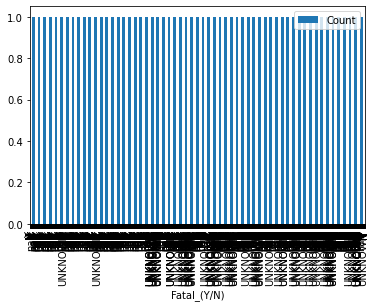

In [145]:
#data.plot(kind="bar", x="Fatal_(Y/N)",y="Count")